In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
bank_full_original = pd.read_csv("../Data/bank-additional-full.csv", sep = ';')

In [4]:
bank = bank_full_original.copy()

Check to make sure bank and bank_full_original are pointing to different objects in memory.

In [5]:
bank is bank_full_original

False

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# Special Note:

In pdays, there is a special code, 999, which indentifies individuals not previously contacted.

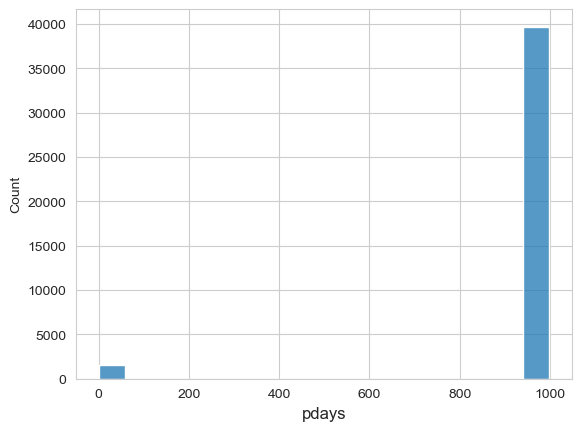

In [8]:
sns.histplot(data = bank,
               x = 'pdays')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.xlabel("pdays", fontsize=12)

plt.show()

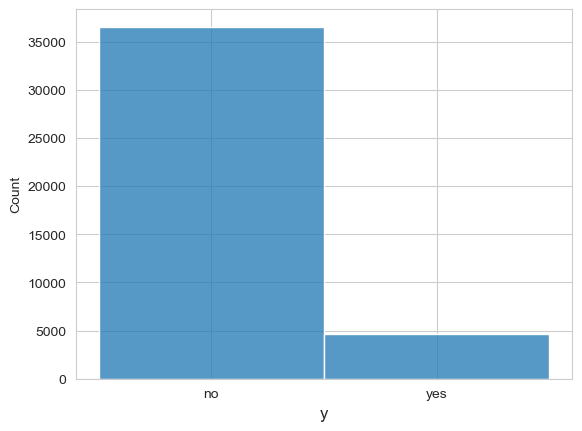

In [9]:
sns.histplot(data = bank,
               x = 'y')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.xlabel("y", fontsize=12)

plt.show()

In [10]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
bank.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Here we see that $96.32\% = 39673/41188$ of the people contacted were new. Here we choose to make numeric variable into a categorical variable with the following bins: 

- values 0-3 get mapped to first_4, 
- values 4-7 get mapped to second_4,
- get mapped to rest,
- 999 gets mapped to never.

We chose this breakdown as the 3 corresponding bins have roughly the same size: 541, 576, and 398. 

To achieve this we write a simple labeling function and use .apply().

In [12]:
def label_pdays(day: int )->str:
    if day == 999:
        return "never"
    elif 0<= day <= 3:
        return "first_4"
    elif 3 < day < 7:
        return "second_4"
    else:
        return "rest"

Further, we are going to drop the `duration` variable because of the casual relationship, if `duration` is $0$, then $y=$ no.

In [13]:
bank_clean = bank.drop(['duration'], axis = 1)

In [14]:
type(bank_clean['pdays'][0])

numpy.int64

In [15]:
bank_clean.loc[:, 'pdays'] = bank_clean.pdays.apply(label_pdays)

In [16]:
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Using boxplots and .describe(), we identified many outliers in serveral numeric variables. After further investigation we declined to exclude values from our model as we determined they were not caused by user error. 

# Tracking variables better.

The outcomes of the variables `default`, `housing`, and `loan` are identicial. As such we wrote another labeling function to better track with response correspondes to which variable. Also, we change the 'yes', 'no' response for the predicted variable to 1/0.

In [17]:
def label_yes_no_housing(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_h'

In [18]:
def label_yes_no_default(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_d'

In [19]:
def label_yes_no_loan(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_l'

In [20]:
def label_yes_no_y(word: str) -> str:
    """Input a `yes' or `no' and returns 0- no, 1- yes"""
    if word == 'yes':
        return 1
    else: 
        return 0

In [21]:
bank_clean.loc[:, 'default'] = bank_clean.default.apply(label_yes_no_default)

In [22]:
bank_clean.loc[:, 'housing'] = bank_clean.housing.apply(label_yes_no_housing)

In [23]:
bank_clean.loc[:, 'loan'] = bank_clean.loan.apply(label_yes_no_loan)

In [24]:
bank_clean.loc[:, 'y'] = bank_clean.y.apply(label_yes_no_y)

In [25]:
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no_d,yes_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no_d,no_h,yes_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# One-hot encde the categorical variables.

In [26]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome']

In [27]:
numeric_variables = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

In [28]:
len(categorical_variables) + len(numeric_variables) == len(bank_clean.columns.tolist())

True

Next we create lists for each categorical variable which will we use to loop over for our one-hot encoding!

In [29]:
bank_feature_job = list(bank_clean['job'].unique())
bank_feature_job.pop(len(bank_clean['job'].unique())-1)

'student'

In [30]:
bank_feature_job

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur']

In [31]:
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'pdays',
 'poutcome']

In [32]:
bank_feature_marital = list(bank_clean['marital'].unique())
bank_feature_marital.pop(len(bank_clean['marital'].unique())-1)

'unknown'

In [33]:
bank_feature_education = list(bank_clean['education'].unique())
bank_feature_education.pop(len(bank_clean['education'].unique())-1)

'illiterate'

In [34]:
bank_feature_default = list(bank_clean['default'].unique())
bank_feature_default.pop(len(bank_clean['default'].unique())-1)

'yes_d'

In [35]:
bank_feature_housing = list(bank_clean['housing'].unique())
bank_feature_housing.pop(len(bank_clean['housing'].unique())-1)

'unknown_h'

In [36]:
bank_feature_loan = list(bank_clean['loan'].unique())
bank_feature_loan.pop(len(bank_clean['loan'].unique())-1)

'unknown_l'

In [37]:
bank_feature_contact = list(bank_clean['contact'].unique())
bank_feature_contact.pop(len(bank_clean['contact'].unique())-1)

'cellular'

In [38]:
bank_feature_month = list(bank_clean['month'].unique())
bank_feature_month.pop(len(bank_clean['month'].unique())-1)

'sep'

In [39]:
bank_feature_day_of_week = list(bank_clean['day_of_week'].unique())
bank_feature_day_of_week.pop(len(bank_clean['day_of_week'].unique())-1)

'fri'

In [40]:
bank_feature_pdays = list(bank_clean['pdays'].unique())
bank_feature_pdays.pop(len(bank_clean['pdays'].unique())-1)

'rest'

In [41]:
bank_feature_poutcome = list(bank_clean['poutcome'].unique())
bank_feature_poutcome.pop(len(bank_clean['poutcome'].unique())-1)

'success'

Make a dictionary to store all of our features!

In [42]:
bank_features_train = {'job' : bank_feature_job, 'marital' : bank_feature_marital, 'education' : bank_feature_education, 'default' : bank_feature_default, 'housing':bank_feature_housing, 'loan':bank_feature_loan, 'contact' : bank_feature_contact, 'month':bank_feature_month, 'day_of_week':bank_feature_day_of_week, 'pdays':bank_feature_pdays, 'poutcome':bank_feature_poutcome}

In [43]:
bank_features_train

{'job': ['housemaid',
  'services',
  'admin.',
  'blue-collar',
  'technician',
  'retired',
  'management',
  'unemployed',
  'self-employed',
  'unknown',
  'entrepreneur'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['basic.4y',
  'high.school',
  'basic.6y',
  'basic.9y',
  'professional.course',
  'unknown',
  'university.degree'],
 'default': ['no_d', 'unknown_d'],
 'housing': ['no_h', 'yes_h'],
 'loan': ['no_l', 'yes_l'],
 'contact': ['telephone'],
 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu'],
 'pdays': ['never', 'second_4', 'first_4'],
 'poutcome': ['nonexistent', 'failure']}

Write loop to one-hot encode our dataset.

In [44]:
for k in bank_features_train.keys():
    for v in bank_features_train[k]:
        bank_clean[v] = pd.get_dummies(bank_clean[k])[v]

In [45]:
len(bank_clean.columns.tolist())

65

In [46]:
bank_clean.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
28148,40,services,married,unknown,unknown_d,no_h,no_l,cellular,apr,mon,...,1,1,0,0,0,1,0,0,0,1
4342,33,blue-collar,single,basic.9y,no_d,yes_h,no_l,telephone,may,tue,...,0,0,1,0,0,1,0,0,1,0
17740,59,retired,divorced,university.degree,unknown_d,yes_h,no_l,cellular,jul,tue,...,0,0,1,0,0,1,0,0,1,0
3504,42,technician,married,high.school,no_d,no_h,no_l,telephone,may,thu,...,0,0,0,0,1,1,0,0,1,0
10622,30,blue-collar,married,basic.6y,no_d,no_h,no_l,telephone,jun,tue,...,0,0,1,0,0,1,0,0,1,0
11261,35,blue-collar,married,high.school,no_d,no_h,no_l,telephone,jun,thu,...,0,0,0,0,1,1,0,0,1,0
32702,31,services,single,high.school,no_d,no_h,yes_l,cellular,may,mon,...,0,1,0,0,0,1,0,0,0,1
24214,48,blue-collar,divorced,professional.course,no_d,no_h,no_l,cellular,nov,mon,...,0,1,0,0,0,1,0,0,1,0
17732,47,technician,married,basic.9y,no_d,unknown_h,unknown_l,cellular,jul,tue,...,0,0,1,0,0,1,0,0,1,0
4439,51,retired,married,basic.9y,no_d,no_h,no_l,telephone,may,tue,...,0,0,1,0,0,1,0,0,1,0


Now subset bank_clean to get just columns we need to train our model.

In [47]:
features_to_subset = numeric_variables + bank_feature_job + bank_feature_marital + bank_feature_education + bank_feature_default + bank_feature_housing + bank_feature_loan + bank_feature_contact + bank_feature_month + bank_feature_day_of_week + bank_feature_pdays + bank_feature_poutcome

In [48]:
features_to_subset

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'married',
 'single',
 'divorced',
 'basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'no_d',
 'unknown_d',
 'no_h',
 'yes_h',
 'no_l',
 'yes_l',
 'telephone',
 'may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'mar',
 'apr',
 'mon',
 'tue',
 'wed',
 'thu',
 'never',
 'second_4',
 'first_4',
 'nonexistent',
 'failure']

In [49]:
len(features_to_subset)

55

In [50]:
bank_clean_ready = bank_clean[features_to_subset]

In [51]:
bank_clean_ready

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,0,0,1,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,0,0,1,0,0,1,0


Scale the first 8 columns

In [52]:
bank_clean_ready_scaled = bank_clean_ready.copy()

In [53]:
bank_clean_ready_scaled is bank_clean_ready

False

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

bank_clean_ready_scaled[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(bank_clean_ready_scaled[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [56]:
bank_clean_ready_scaled

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,0,0,0,0,0,1,0,0,1,0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,0,0,0,0,0,1,0,0,1,0


# Model Building

# Logistic Regression

In [57]:
target = bank_clean_ready_scaled.y

In [58]:
target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [59]:
bank_regress = bank_clean_ready_scaled.drop(['y'], axis = 1)

In [60]:
bank_regress

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housemaid,services,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1,0,...,0,1,0,0,0,1,0,0,1,0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,...,0,1,0,0,0,1,0,0,1,0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0


In [61]:
del bank_regress

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [63]:
## Making the split

bank_train, bank_test = train_test_split(bank_clean_ready_scaled.copy(),
                                         random_state = 440,
                                         shuffle = True,
                                         test_size = .2, 
                                         stratify = bank['y'])

In [64]:
bank_train

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
20813,-0.961898,-0.204909,-0.349494,0.839061,-0.227465,0.951267,0.774728,0.845170,0,0,...,0,0,0,1,0,1,0,0,1,0
4990,-0.769980,-0.204909,-0.349494,0.648092,0.722722,0.886447,0.713036,0.331680,0,0,...,0,0,0,1,0,1,0,0,1,0
27391,-0.578062,-0.204909,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,0,0,...,0,0,0,0,0,1,0,0,1,0
7337,0.189609,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.716496,0.331680,0,0,...,0,0,0,0,0,1,0,0,1,0
4500,0.957281,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,-0.098268,-0.565922,1.671136,-1.197935,-0.864955,-1.425496,-1.254761,-0.940281,0,0,...,1,0,0,1,0,1,0,0,0,1
20764,1.149199,3.044213,-0.349494,0.839061,-0.227465,0.951267,0.774728,0.845170,0,1,...,0,0,0,1,0,1,0,0,1,0
26157,-0.674021,-0.204909,-0.349494,-0.115781,-0.649003,-0.323542,0.287536,0.398115,0,0,...,0,0,0,1,0,1,0,0,1,0
34991,-1.153816,2.322186,-0.349494,-1.197935,-1.179380,-1.231034,-1.367190,-0.940281,0,0,...,0,0,0,0,0,1,0,0,1,0


In [65]:
bank_train.drop(['y'], axis = 1).columns.tolist()

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'married',
 'single',
 'divorced',
 'basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'no_d',
 'unknown_d',
 'no_h',
 'yes_h',
 'no_l',
 'yes_l',
 'telephone',
 'may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'mar',
 'apr',
 'mon',
 'tue',
 'wed',
 'thu',
 'never',
 'second_4',
 'first_4',
 'nonexistent',
 'failure']

In [66]:
Cs = [100,10,1,.1,.01,.001,.0001,.00001,.000001,.0000001]

coefs = np.zeros((len(Cs), 54))

i = 0
for C in Cs:
    log_reg = LogisticRegression(penalty='l1',C=C,solver='liblinear')
    log_reg.fit(bank_train.drop(['y'], axis = 1), bank_train['y'])
    
    coefs[i,:] = log_reg.coef_
    i = i + 1

In [67]:
log_reg_coef = pd.DataFrame(coefs, 
             index=["C="+str(C) for C in Cs], 
             columns = bank_train.drop(['y'], axis = 1).columns.tolist()).round(6)

In [68]:
log_reg_coef

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housemaid,services,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
C=100,0.014498,-0.128549,-0.034120,-2.392422,1.220976,0.123541,0.385668,0.517295,-0.262292,-0.336912,...,-0.361518,-0.215561,0.052212,0.134608,0.064977,-1.035117,0.121806,0.185816,-0.308569,-0.723579
C=10,0.014351,-0.128468,-0.034201,-2.377659,1.211794,0.122857,0.386980,0.506348,-0.255513,-0.331711,...,-0.353804,-0.216093,0.051415,0.133728,0.064133,-1.040625,0.117814,0.181378,-0.306782,-0.721587
C=1,0.012591,-0.128091,-0.032654,-2.198052,1.093004,0.112212,0.428908,0.351226,-0.182791,-0.274043,...,-0.240532,-0.220987,0.042663,0.125057,0.056457,-1.083850,0.091539,0.154971,-0.274670,-0.692393
C=0.1,0.008245,-0.124373,-0.024756,-1.202004,0.632095,0.124108,0.046126,0.000000,0.000000,-0.113457,...,-0.062006,-0.239652,0.000000,0.064304,0.000000,-1.394590,0.000000,0.000000,0.000000,-0.435701
C=0.01,0.000000,-0.055934,-0.089522,-0.102496,0.000000,0.024375,0.000000,-0.669678,0.000000,0.000000,...,0.000000,-0.074438,0.000000,0.000000,0.000000,-1.692550,0.000000,0.000000,0.000000,-0.012460
C=0.001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.411638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.777971,0.000000,0.000000,0.000000,0.000000
C=0.0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.373592,0.000000,0.000000,0.000000,0.000000
C=1e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C=1e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C=1e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
log_reg = LogisticRegression()
log_reg.fit(bank_train.drop(['y'], axis = 1),bank_train['y'])

C:\Users\drewa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
bank_train.sample(10)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
19620,1.724952,-0.565922,-0.349494,0.839061,-0.227465,0.951267,0.776458,0.845170,0,0,...,0,0,0,0,1,1,0,0,1,0
36516,-0.098268,-0.565922,-0.349494,-1.898153,-1.058448,-0.064259,-1.361425,-1.257233,0,0,...,0,0,0,1,0,1,0,0,1,0
8945,1.149199,-0.565922,-0.349494,0.839061,1.536429,-0.280328,0.717649,0.845170,0,0,...,0,0,0,0,1,1,0,0,1,0
27823,2.492624,-0.565922,-0.349494,-1.197935,-1.265761,-2.052098,-1.136566,-0.940281,1,0,...,0,0,0,0,1,1,0,0,1,0
4309,0.477486,0.156105,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,0,0,...,0,0,1,0,0,1,0,0,1,0
13549,0.861322,-0.565922,-0.349494,0.839061,0.591424,-0.474791,0.773575,0.845170,0,0,...,0,0,0,0,1,1,0,0,1,0
21387,0.381527,-0.204909,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,0,0,...,0,0,1,0,0,1,0,0,1,0
28557,1.245157,-0.565922,-0.349494,-1.197935,-0.864955,-1.425496,-1.272058,-0.940281,0,0,...,1,0,0,1,0,1,0,0,1,0
36040,-0.482104,-0.565922,-0.349494,-1.197935,-1.179380,-1.231034,-1.357965,-0.940281,0,0,...,0,0,1,0,0,1,0,0,1,0
16104,0.093650,-0.565922,-0.349494,0.839061,0.591424,-0.474791,0.772422,0.845170,0,0,...,0,0,1,0,0,1,0,0,1,0


In [71]:
pred = log_reg.predict(bank_train.drop(['y'], axis = 1))

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(bank_train['y'], pred)

array([[28831,   407],
       [ 2863,   849]], dtype=int64)

In [74]:
TN_log = confusion_matrix(bank_train['y'], pred)[0,0]
FP_log = confusion_matrix(bank_train['y'], pred)[0,1]
FN_log = confusion_matrix(bank_train['y'], pred)[1,0]
TP_log = confusion_matrix(bank_train['y'], pred)[1,1]

In [75]:
## Calculate recall and precision here!

print("The training recall is", 
      np.round(TP_log/(TP_log + FN_log),4))

print("The training precision is", 
      np.round(TP_log/(TP_log + FP_log),4))


The training recall is 0.2287
The training precision is 0.676


In [76]:
## TPR
print("The training true positive rate is",
         np.round(TP_log/(TP_log+FN_log),4))


## FNR
print("The training false negative rate is",
         np.round(FN_log/(TP_log+FN_log),4))



## TNR
print("The training true negative rate is",
         np.round(TN_log/(TN_log+FP_log),4))



## FPR
print("The training false positive rate is",
         np.round(FP_log/(FP_log+TN_log),4))

The training true positive rate is 0.2287
The training false negative rate is 0.7713
The training true negative rate is 0.9861
The training false positive rate is 0.0139


In [102]:
pred_test_lr = log_reg.predict(bank_test.drop(['y'], axis = 1))

In [105]:
cm_lr_test = confusion_matrix(bank_test['y'], pred_test_lr)
cm_lr_test

array([[7199,  111],
       [ 727,  201]], dtype=int64)

In [106]:
TN_lr_test = cm_lr_test[0,0]
FP_lr_test = cm_lr_test[0,1]
FN_lr_test = cm_lr_test[1,0]
TP_lr_test = cm_lr_test[1,1]

In [137]:
print("The training recall is", 
     np.round(TP_lr_test/(TP_lr_test + FN_lr_test),4))

print("The training precision is", 
      np.round(TP_lr_test/(TP_lr_test + FP_lr_test),4))


The training recall is 0.2166
The training precision is 0.6442


In [108]:
## TPR
print("The training true positive rate is",
         np.round(TP_lr_test/(TP_lr_test+FN_lr_test),4))


## FNR
print("The training false negative rate is",
         np.round(FN_lr_test/(TP_lr_test+FN_lr_test),4))



## TNR
print("The training true negative rate is",
         np.round(TN_lr_test/(TN_lr_test+FP_lr_test),4))



## FPR
print("The training false positive rate is",
         np.round(FP_lr_test/(FP_lr_test+TN_lr_test),4))

The training true positive rate is 0.2166
The training false negative rate is 0.7834
The training true negative rate is 0.9848
The training false positive rate is 0.0152


## KNN Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(5)

## 'fit' the model object

knn.fit(bank_train.drop(['y'], axis = 1), bank_train['y'])

## predict on the trianing set

pred_knn_5 = knn.predict(bank_train.drop(['y'], axis = 1))

In [79]:
pred_knn_5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
confusion_matrix(bank_train['y'], pred_knn_5)

array([[28671,   567],
       [ 2329,  1383]], dtype=int64)

In [81]:
TN_knn_5 = confusion_matrix(bank_train['y'], pred_knn_5)[0,0]
FP_knn_5 = confusion_matrix(bank_train['y'], pred_knn_5)[0,1]
FN_knn_5 = confusion_matrix(bank_train['y'], pred_knn_5)[1,0]
TP_knn_5 = confusion_matrix(bank_train['y'], pred_knn_5)[1,1]

In [82]:
print("The training recall is", 
      np.round(TP_knn_5/(TP_knn_5 + FN_knn_5),4))

print("The training precision is", 
      np.round(TP_knn_5/(TP_knn_5 + FP_knn_5),4))

The training recall is 0.3726
The training precision is 0.7092


In [83]:
## TPR
print("The training true positive rate is",
         np.round(TP_knn_5/(TP_knn_5+FN_knn_5),4))


## FNR
print("The training false negative rate is",
         np.round(FN_knn_5/(TP_knn_5+FN_knn_5),4))



## TNR
print("The training true negative rate is",
         np.round(TN_knn_5/(TN_knn_5+FP_knn_5),4))



## FPR
print("The training false positive rate is",
         np.round(FP_knn_5/(FP_knn_5+TN_knn_5),4))

The training true positive rate is 0.3726
The training false negative rate is 0.6274
The training true negative rate is 0.9806
The training false positive rate is 0.0194


##### Test Data

In [109]:
pred_knn_5_test = knn.predict(bank_test.drop(['y'], axis = 1))

In [110]:
cm_knn = confusion_matrix(bank_test['y'], pred_knn_5_test)
cm_knn

array([[7077,  233],
       [ 668,  260]], dtype=int64)

In [111]:
TN_knn_5_test = cm_knn[0,0]
FP_knn_5_test = cm_knn[0,1]
FN_knn_5_test = cm_knn[1,0]
TP_knn_5_test = cm_knn[1,1]

In [112]:
print("The training recall is", 
      np.round(TP_knn_5_test/(TP_knn_5_test + FN_knn_5_test),4))

print("The training precision is", 
      np.round(TP_knn_5_test/(TP_knn_5_test + FP_knn_5_test),4))

The training recall is 0.2802
The training precision is 0.5274


In [113]:
## TPR
print("The training true positive rate is",
         np.round(TP_knn_5_test/(TP_knn_5_test+FN_knn_5_test),4))


## FNR
print("The training false negative rate is",
         np.round(FN_knn_5_test/(TP_knn_5_test+FN_knn_5_test),4))



## TNR
print("The training true negative rate is",
         np.round(TN_knn_5_test/(TN_knn_5_test+FP_knn_5_test),4))



## FPR
print("The training false positive rate is",
         np.round(FP_knn_5_test/(FP_knn_5_test+TN_knn_5_test),4))

The training true positive rate is 0.2802
The training false negative rate is 0.7198
The training true negative rate is 0.9681
The training false positive rate is 0.0319


## Random Forest Model

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
tree = DecisionTreeClassifier(max_depth = 2)

rf = RandomForestClassifier(1000,
                            max_depth = 2,
                            random_state = 440,
                            max_samples = 80)

In [86]:
tree_model = tree.fit(bank_train.drop(['y'], axis = 1), bank_train['y'])

rf.fit(bank_train.drop(['y'], axis = 1), bank_train['y'])

RandomForestClassifier(max_depth=2, max_samples=80, n_estimators=1000,
                       random_state=440)

In [87]:
tree_preds = tree.predict(bank_train.drop(['y'], axis = 1))

rf_preds = rf.predict(bank_train.drop(['y'], axis = 1))

In [88]:
tree_confusion_matrix = confusion_matrix(tree_preds, bank_train['y'])
rf_confusion_matrix = confusion_matrix(rf_preds, bank_train['y'])

In [89]:
tree_confusion_matrix

array([[28949,  3011],
       [  289,   701]], dtype=int64)

In [90]:
rf_confusion_matrix

array([[29238,  3709],
       [    0,     3]], dtype=int64)

In [91]:
from sklearn import tree

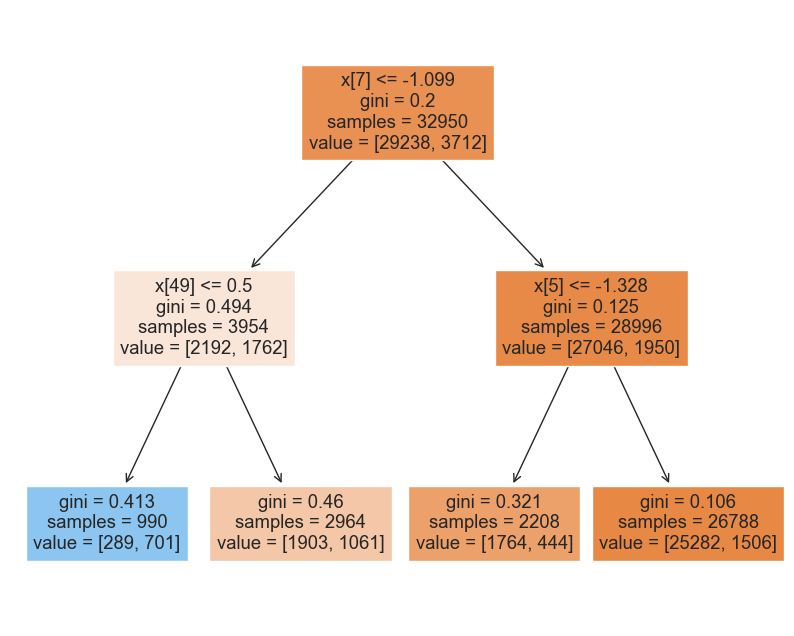

In [92]:
plt.figure(figsize = (10,8))
tree.plot_tree(tree_model, filled = True)
plt.show()

#### Decision Tree Confusion Data on Test Set

In [115]:
tree_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
tree_preds_test = tree_model.predict(bank_test.drop(['y'], axis = 1))

In [119]:
cm_dt_test = confusion_matrix(tree_preds_test, bank_test['y'])
cm_dt_test

array([[7227,  756],
       [  83,  172]], dtype=int64)

In [120]:
TN_dt_test = cm_dt_test[0,0]
FP_dt_test = cm_dt_test[0,1]
FN_dt_test = cm_dt_test[1,0]
TP_dt_test = cm_dt_test[1,1]

In [121]:
print("The training recall is", 
      np.round(TP_dt_test/(TP_dt_test + FN_dt_test),4))

print("The training precision is", 
      np.round(TP_dt_test/(TP_dt_test + FP_dt_test),4))

The training recall is 0.6745
The training precision is 0.1853


In [122]:
## TPR
print("The training true positive rate is",
         np.round(TP_dt_test/(TP_dt_test+FN_dt_test),4))


## FNR
print("The training false negative rate is",
         np.round(FN_dt_test/(TP_dt_test+FN_dt_test),4))



## TNR
print("The training true negative rate is",
         np.round(TN_dt_test/(TN_dt_test+FP_dt_test),4))



## FPR
print("The training false positive rate is",
         np.round(FP_dt_test/(FP_dt_test+TN_dt_test),4))

The training true positive rate is 0.6745
The training false negative rate is 0.3255
The training true negative rate is 0.9053
The training false positive rate is 0.0947


# Random Forest Confusion data

In [93]:
TN_rf = rf_confusion_matrix[0,0]
FP_rf = rf_confusion_matrix[0,1]
FN_rf = rf_confusion_matrix[1,0]
TP_rf = rf_confusion_matrix[1,1]

In [94]:
print("The training recall for our random forest model is", 
      np.round(TP_rf/(TP_rf + FN_rf),4))

print("The training precision for our random forest model is", 
      np.round(TP_rf/(TP_rf + FP_rf),4))

The training recall for our random forest model is 1.0
The training precision for our random forest model is 0.0008


In [95]:
## TPR
print("The training true positive rate for our rf-model is",
         np.round(TP_rf/(TP_rf+FN_rf),4))


## FNR
print("The training false negative rate for our rf-model is",
         np.round(FN_rf/(TP_rf+FN_rf),4))



## TNR
print("The training true negative rate for our rf-model is",
         np.round(TN_rf/(TN_rf+FP_rf),4))



## FPR
print("The training false positive rate for our rf-model is",
         np.round(FP_rf/(FP_rf+TN_rf),4))

The training true positive rate for our rf-model is 1.0
The training false negative rate for our rf-model is 0.0
The training true negative rate for our rf-model is 0.8874
The training false positive rate for our rf-model is 0.1126


# Decision Tree confusion matrix data

In [96]:
TN_tree = tree_confusion_matrix[0,0]
FP_tree = tree_confusion_matrix[0,1]
FN_tree = tree_confusion_matrix[1,0]
TP_tree = tree_confusion_matrix[1,1]

In [97]:
print("The training recall for our decision tree model is", 
      np.round(TP_tree/(TP_tree + FN_tree),4))

print("The training precision for our decision tree model is", 
      np.round(TP_tree/(TP_tree + FP_tree),4))

The training recall for our decision tree model is 0.7081
The training precision for our decision tree model is 0.1888


In [98]:
## TPR
print("The training true positive rate for our decision tree model is",
         np.round(TP_tree/(TP_tree+FN_tree),4))


## FNR
print("The training false negative rate for our decision tree model is",
         np.round(FN_tree/(TP_tree+FN_tree),4))



## TNR
print("The training true negative rate for our decision tree model is",
         np.round(TN_tree/(TN_tree+FP_tree),4))



## FPR
print("The training false positive rate for our decision tree model is",
         np.round(FP_tree/(FP_tree+TN_tree),4))

The training true positive rate for our decision tree model is 0.7081
The training false negative rate for our decision tree model is 0.2919
The training true negative rate for our decision tree model is 0.9058
The training false positive rate for our decision tree model is 0.0942


#### Random Forest test set data

In [123]:
preds_rf_test = rf.predict(bank_test.drop(['y'], axis = 1))

In [125]:
cm_rf_test = confusion_matrix(preds_rf_test, bank_test['y'])
cm_rf_test

array([[7310,  927],
       [   0,    1]], dtype=int64)

In [126]:
TN_rf_test = cm_rf_test[0,0]
FP_rf_test = cm_rf_test[0,1]
FN_rf_test = cm_rf_test[1,0]
TP_rf_test = cm_rf_test[1,1]

In [127]:
print("The training recall is", 
      np.round(TP_rf_test/(TP_rf_test + FN_rf_test),4))

print("The training precision is", 
      np.round(TP_rf_test/(TP_rf_test + FP_rf_test),4))

The training recall is 1.0
The training precision is 0.0011


In [128]:
## TPR
print("The training true positive rate is",
         np.round(TP_rf_test/(TP_rf_test+FN_rf_test),4))


## FNR
print("The training false negative rate is",
         np.round(FN_rf_test/(TP_rf_test+FN_rf_test),4))



## TNR
print("The training true negative rate is",
         np.round(TN_rf_test/(TN_rf_test+FP_rf_test),4))



## FPR
print("The training false positive rate is",
         np.round(FP_rf_test/(FP_rf_test+TN_rf_test),4))

The training true positive rate is 1.0
The training false negative rate is 0.0
The training true negative rate is 0.8875
The training false positive rate is 0.1125


# Model Comparison

In [101]:
model_summary = pd.DataFrame(index = ['logistic regression', 'KNN', 'Decision Tree', 'Random Forest', 'Support Vector Machine'], columns = ['Precision', 'Recall', 'True Positive Rate (TPR)', 'False Negative Rate (FNR)'])
model_summary

,Precision,Recall,True Positive Rate (TPR),False Negative Rate (FNR)
logistic regression,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN


# Conclusion

In [133]:
model_summary['Precision'] = [.6442, .5274, .6745, 1, 0]

In [135]:
model_summary['Recall'] = [0.2166, 0.2802, 0.1853, 0.0011, 0]

In [138]:
model_summary['True Positive Rate (TPR)'] = [0.2166, 0.2802, 0.6745, 1, 0]

In [139]:
model_summary['False Negative Rate (FNR)'] = [0.7834, 0.7198, 0.3255, 0 , 0]

In [140]:
model_summary

,Precision,Recall,True Positive Rate (TPR),False Negative Rate (FNR)
logistic regression,0.6442,0.2166,0.2166,0.7834
KNN,0.5274,0.2802,0.2802,0.7198
Decision Tree,0.6745,0.1853,0.6745,0.3255
Random Forest,1.0000,0.0011,1.0000,0.0000
Support Vector Machine,0.0000,0.0000,0.0000,0.0000


In [144]:
from pandas.plotting import table # EDIT: see deprecation warnings below

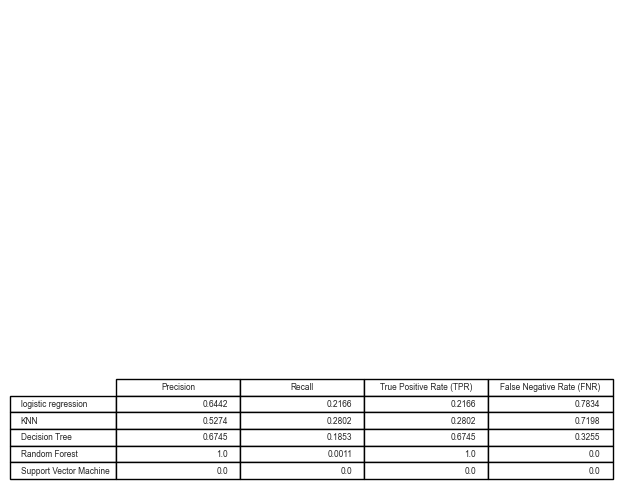

In [148]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, model_summary)  # where df is your data frame


plt.savefig('model_summary.png')